一、資料結構整理

In [1]:
import pandas as pd
import matplotlib.pyplot as plt,seaborn

In [2]:
train_file=pd.read_csv("Final_Train.csv")
train_file

,ID,Temp_m,Generation,Irradiance,Capacity,Lat,Lon,Angle,Irradiance_m,Temp,Module
0,1,47.253,630,8.37,499.80,25.11,121.26,22.00,2325,26.3,1
1,2,47.531,2246,17.11,499.80,25.11,121.26,22.00,4753,27.9,1
2,3,49.763,1147,12.26,499.80,25.11,121.26,22.00,3406,28.0,1
3,4,51.098,2946,21.51,499.80,25.11,121.26,22.00,5975,28.6,1
4,5,52.017,3139,23.18,499.80,25.11,121.26,22.00,6439,29.1,1
...,...,...,...,...,...,...,...,...,...,...,...
3579,3580,40.900,2285,18.73,498.56,24.04,120.52,2.21,131913,25.0,2
3580,3581,43.700,423,18.73,99.20,24.08,120.50,1.76,459967,25.0,2
3581,3582,44.400,1496,18.73,343.20,24.08,120.52,-2.62,107142,25.0,3
3582,3583,47.500,450,18.73,99.84,24.07,120.48,10.35,431817,25.0,2


In [3]:
test_file=pd.read_csv("Final_Test.csv")
test_file

,ID,Temp_m,Irradiance,Capacity,Lat,Lon,Angle,Irradiance_m,Temp,Module
0,1,40.248,18.32,283.2,24.980,121.03,-31.00,5089,22.0,4
1,2,34.948,8.72,499.8,25.110,121.26,22.00,2422,22.2,1
2,3,33.528,8.72,438.3,25.110,121.26,-160.00,2422,22.2,1
3,4,38.416,18.32,498.6,25.030,121.08,-95.00,5089,22.6,1
4,5,38.700,17.10,492.8,24.107,120.44,4.63,121729,23.9,2
...,...,...,...,...,...,...,...,...,...,...
1534,1535,35.300,20.16,343.2,24.080,120.52,-2.62,126196,17.2,3
1535,1536,20.095,6.47,499.8,25.110,121.26,22.00,1797,15.8,1
1536,1537,19.654,6.47,438.3,25.110,121.26,-160.00,1797,15.8,1
1537,1538,20.285,6.98,283.2,24.980,121.03,-31.00,1939,15.9,4


In [4]:
train_file['ID'][0] in test_file['ID']

True

In [5]:
train_ans=train_file.drop(columns=["ID","Temp_m","Irradiance","Capacity","Lat","Lon","Angle","Irradiance_m","Temp","Module"],axis=1)
train_info=train_file.drop(columns=['Generation'],axis=1)
train_info

,ID,Temp_m,Irradiance,Capacity,Lat,Lon,Angle,Irradiance_m,Temp,Module
0,1,47.253,8.37,499.80,25.11,121.26,22.00,2325,26.3,1
1,2,47.531,17.11,499.80,25.11,121.26,22.00,4753,27.9,1
2,3,49.763,12.26,499.80,25.11,121.26,22.00,3406,28.0,1
3,4,51.098,21.51,499.80,25.11,121.26,22.00,5975,28.6,1
4,5,52.017,23.18,499.80,25.11,121.26,22.00,6439,29.1,1
...,...,...,...,...,...,...,...,...,...,...
3579,3580,40.900,18.73,498.56,24.04,120.52,2.21,131913,25.0,2
3580,3581,43.700,18.73,99.20,24.08,120.50,1.76,459967,25.0,2
3581,3582,44.400,18.73,343.20,24.08,120.52,-2.62,107142,25.0,3
3582,3583,47.500,18.73,99.84,24.07,120.48,10.35,431817,25.0,2


In [6]:
train_ans

,Generation
0,630
1,2246
2,1147
3,2946
4,3139
...,...
3579,2285
3580,423
3581,1496
3582,450


In [7]:
predict=pd.DataFrame(data=test_file['ID'],columns=['ID'])
predict_data=predict.merge(test_file,how='left',on='ID')
predict_data

,ID,Temp_m,Irradiance,Capacity,Lat,Lon,Angle,Irradiance_m,Temp,Module
0,1,40.248,18.32,283.2,24.980,121.03,-31.00,5089,22.0,4
1,2,34.948,8.72,499.8,25.110,121.26,22.00,2422,22.2,1
2,3,33.528,8.72,438.3,25.110,121.26,-160.00,2422,22.2,1
3,4,38.416,18.32,498.6,25.030,121.08,-95.00,5089,22.6,1
4,5,38.700,17.10,492.8,24.107,120.44,4.63,121729,23.9,2
...,...,...,...,...,...,...,...,...,...,...
1534,1535,35.300,20.16,343.2,24.080,120.52,-2.62,126196,17.2,3
1535,1536,20.095,6.47,499.8,25.110,121.26,22.00,1797,15.8,1
1536,1537,19.654,6.47,438.3,25.110,121.26,-160.00,1797,15.8,1
1537,1538,20.285,6.98,283.2,24.980,121.03,-31.00,1939,15.9,4


二、利用皮爾森相關係數進行特徵選擇

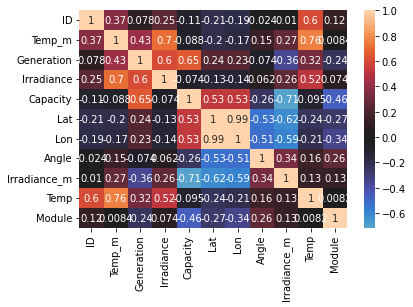

In [8]:
train_corr=train_file.corr()
seaborn.heatmap(train_corr,center=0,annot=True)
plt.show()

In [9]:
train_info=train_info.drop(columns=['ID','Lat','Lon','Angle','Module','Irradiance_m','Temp','Temp_m'],axis=1)
train_info

,Irradiance,Capacity
0,8.37,499.80
1,17.11,499.80
2,12.26,499.80
3,21.51,499.80
4,23.18,499.80
...,...,...
3579,18.73,498.56
3580,18.73,99.20
3581,18.73,343.20
3582,18.73,99.84


In [10]:
predict_data=predict_data.drop(columns=['ID','Lat','Lon','Angle','Module','Irradiance_m','Temp','Temp_m'],axis=1)
predict_data

,Irradiance,Capacity
0,18.32,283.2
1,8.72,499.8
2,8.72,438.3
3,18.32,498.6
4,17.10,492.8
...,...,...
1534,20.16,343.2
1535,6.47,499.8
1536,6.47,438.3
1537,6.98,283.2


三、正規化

In [11]:
from sklearn.preprocessing import StandardScaler
z=StandardScaler()

In [45]:
train_info=z.fit_transform(train_info)
train_info

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.28393667,  1.03312757],
       [-0.01187024,  1.03312757],
       [-0.71776523,  1.03312757],
       ...,
       [ 0.22391324, -0.05076899],
       [ 0.22391324, -1.73516915],
       [ 0.22391324, -0.49927791]])

In [13]:
predict_data=z.fit_transform(predict_data)
predict_data

array([[ 1.2229819 , -0.39605165],
       [-0.68369197,  1.23936725],
       [-0.68369197,  0.77501701],
       ...,
       [-1.13056866,  0.77501701],
       [-1.02927661, -0.39605165],
       [-1.02927661,  1.23030676]])

In [14]:
train_ans=z.fit_transform(train_ans)
train_ans

array([[-0.89065411],
       [ 1.13799969],
       [-0.24163554],
       ...,
       [ 0.19648338],
       [-1.11661802],
       [-0.37093711]])

四、模型訓練並進行預測

In [15]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=1000,max_features='auto',n_jobs=-1,oob_score=True,bootstrap=True,random_state=1)
rf_model=rf.fit(train_info,train_ans)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_4792/55570645.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model=rf.fit(train_info,train_ans)


In [16]:
rf_y_pred=rf_model.predict(predict_data)

In [17]:
rf_output=pd.DataFrame()
rf_output['ID']=test_file['ID']
rf_output['Generation']=rf_y_pred
rf_output

,ID,Generation
0,1,0.275499
1,2,0.680029
2,3,0.370941
3,4,1.417284
4,5,1.832370
...,...,...
1534,1535,0.973959
1535,1536,0.179766
1536,1537,-0.161264
1537,1538,-0.781514


In [18]:
rf_output.describe()

,ID,Generation
count,1539.000000,1539.000000
mean,770.000000,-0.058479
std,444.415346,0.890691
min,1.000000,-1.509739
25%,385.500000,-0.911209
50%,770.000000,-0.083982
75%,1154.500000,0.572239
max,1539.000000,2.161960


In [19]:
from sklearn.neural_network import MLPRegressor
mlp=MLPRegressor(batch_size=50,learning_rate='adaptive',random_state=1)
mlp_model=mlp.fit(train_info,train_ans)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
mlp_y_pred=mlp_model.predict(predict_data)

In [21]:
mlp_output=pd.DataFrame()
mlp_output['ID']=test_file['ID']
mlp_output['Generation']=mlp_y_pred
mlp_output

,ID,Generation
0,1,0.334276
1,2,0.366734
2,3,0.005097
3,4,1.953303
4,5,1.752282
...,...,...
1534,1535,0.944528
1535,1536,-0.055041
1536,1537,-0.420498
1537,1538,-0.722320


In [22]:
mlp_output.describe()

,ID,Generation
count,1539.000000,1539.000000
mean,770.000000,0.001228
std,444.415346,0.910478
min,1.000000,-1.511747
25%,385.500000,-0.805352
50%,770.000000,-0.045934
75%,1154.500000,0.581619
max,1539.000000,2.188682


In [23]:
from xgboost import XGBRegressor 
xgb=XGBRegressor()
xgb_model=xgb.fit(train_info,train_ans)

In [24]:
xgb_y_pred=xgb_model.predict(predict_data)

In [25]:
xgb_output=pd.DataFrame()
xgb_output['ID']=test_file['ID']
xgb_output['Generation']=xgb_y_pred
xgb_output

,ID,Generation
0,1,-0.111113
1,2,0.847563
2,3,0.521279
3,4,1.869930
4,5,1.675896
...,...,...
1534,1535,1.039548
1535,1536,0.139063
1536,1537,-0.332028
1537,1538,-0.821943


In [26]:
xgb_output.describe()

,ID,Generation
count,1539.000000,1539.000000
mean,770.000000,-0.064192
std,444.415346,0.891008
min,1.000000,-1.743128
25%,385.500000,-0.888851
50%,770.000000,-0.092214
75%,1154.500000,0.555962
max,1539.000000,2.135717


In [27]:
from sklearn import preprocessing
from sklearn import utils
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(train_ans)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log_model=log.fit(train_info,y_transformed)

In [29]:
log_y_pred=log_model.predict(predict_data)

In [30]:
log_output=pd.DataFrame()
log_output['ID']=test_file['ID']
log_output['Generation']=log_y_pred
log_output

,ID,Generation
0,1,930
1,2,1280
2,3,1280
3,4,1629
4,5,1629
...,...,...
1534,1535,930
1535,1536,1280
1536,1537,174
1537,1538,244


In [31]:
log_output.describe()

,ID,Generation
count,1539.000000,1539.000000
mean,770.000000,808.379467
std,444.415346,512.764270
min,1.000000,174.000000
25%,385.500000,272.000000
50%,770.000000,855.000000
75%,1154.500000,1280.000000
max,1539.000000,1866.000000


In [32]:
from sklearn.svm import SVR
svm=SVR()
svm_model=svm.fit(train_info,train_ans)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
svm_y_pred=svm_model.predict(predict_data)

In [34]:
svm_output=pd.DataFrame()
svm_output['ID']=test_file['ID']
svm_output['Generation']=svm_y_pred
svm_output

,ID,Generation
0,1,0.341111
1,2,0.315352
2,3,-0.011948
3,4,1.965910
4,5,1.749124
...,...,...
1534,1535,0.948047
1535,1536,-0.153963
1536,1537,-0.413453
1537,1538,-0.755045


In [35]:
svm_output.describe()

,ID,Generation
count,1539.000000,1539.000000
mean,770.000000,-0.019401
std,444.415346,0.920945
min,1.000000,-1.475633
25%,385.500000,-0.895896
50%,770.000000,-0.059240
75%,1154.500000,0.572631
max,1539.000000,2.200760


In [36]:
from sklearn.tree import DecisionTreeRegressor 
dt=DecisionTreeRegressor()
dt_model=dt.fit(train_info,train_ans)

In [37]:
dt_y_pred=dt_model.predict(predict_data)

In [38]:
dt_output=pd.DataFrame()
dt_output['ID']=test_file['ID']
dt_output['Generation']=dt_y_pred
dt_output

,ID,Generation
0,1,0.279337
1,2,1.106616
2,3,0.609495
3,4,1.877404
4,5,1.943938
...,...,...
1534,1535,1.008698
1535,1536,0.590665
1536,1537,0.131205
1537,1538,-0.765119


In [39]:
dt_output.describe()

,ID,Generation
count,1539.000000,1539.000000
mean,770.000000,-0.060856
std,444.415346,0.920184
min,1.000000,-1.510800
25%,385.500000,-0.959699
50%,770.000000,-0.093504
75%,1154.500000,0.568068
max,1539.000000,2.230159


五、績效評估

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
answer=pd.read_csv("answer.csv")
answer

,Generation
0,630
1,2246
2,1147
3,2946
4,3139
...,...
1534,2046
1535,1704
1536,1245
1537,1196


In [42]:
rf_result=rf_output['Generation']*500.53+1309.76
mlp_result=mlp_output['Generation']*496.20+1262.12
xgb_result=xgb_output['Generation']*500.76+1309.79
log_result=log_output['Generation']
svm_result=svm_output['Generation']*342.94+1299.36
dt_result=dt_output['Generation']*500.77+1309.79

In [43]:
print("rf:",mean_squared_error(answer,rf_result,squared=False))
print("mlpnn:",mean_squared_error(answer,mlp_result,squared=False))
print("xgboost:",mean_squared_error(answer,xgb_result,squared=False))
print("logistic:",mean_squared_error(answer,log_result,squared=False))
print("svm:",mean_squared_error(answer,svm_result,squared=False))
print("dt:",mean_squared_error(answer,dt_result,squared=False))

rf: 915.9192741348376
mlpnn: 921.8439612678663
xgboost: 916.4786666010593
logistic: 1039.3132635442873
svm: 866.1064191364815
dt: 922.4693880297083


In [44]:
svm_output.to_csv("預測結果.csv",index=False,encoding='utf-8-sig')